### __Задача 1__

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.

В случае __неизвестной дисперсии__ мы используем статистику
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — выборочное среднее квадратическое отклонение. Эта статистика имеет распределение Стьюдента, поэтому
$$P \left( t_{\alpha / 2, \: n - 1} \leq t \leq t_{1 - \alpha / 2, \: n - 1} \right) = p,$$
где $t_{x, \: n - 1}$ — квантиль порядка $x$ для распределения Стьюдента с параметром $df = n - 1$. Аналогичным способом получаем доверительный интервал:
$$P \left( \overline{X} + t_{\alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \right) = p$$

In [3]:
import numpy as np
from scipy import stats

In [4]:
mean = 80
std = 16
p = 0.95
n = 256

In [9]:
alpha = 1 - p

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

In [10]:
print((mean + t1 * (std / np.sqrt(n)), mean + t2 * (std / np.sqrt(n))), 
round((mean + t2 * (std / np.sqrt(n))) - (mean + t1 * (std / np.sqrt(n))), 8))

(78.04003601545995, 81.95996398454005) 3.91992797


### __Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.


In [47]:
def statistic(mean, smean, std, n):
    return (smean - mean) / (std / np.sqrt(n))

In [51]:
weights = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

In [52]:
mean = 200
alpha = 0.01
n = weights.shape[0]
samples_mean = weights.mean()
std = weights.std(ddof=1)

In [54]:
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
S = statistic(mean, samples_mean, std, n)

t1, t2

(-3.24983554401537, 3.2498355440153697)

Итак, теперь критическая область немного шире:
$$\Omega_\alpha = (-\infty, -3.25) \cup (3.25, \infty)$$

In [38]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

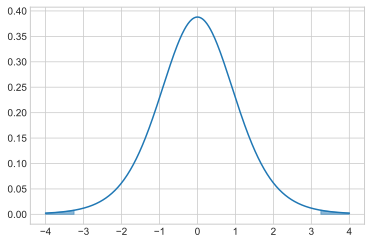

In [55]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [65]:
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

print(f'P-значение для данного теста: %.8f' % pvalue)

P-значение для данного теста: 0.31456660


### __Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

In [67]:
def statistic(n, sample_variance, variance):
    return (n - 1) * sample_variance / variance

samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])
alpha = 0.05
variance = 0.0625
sample_variance = samples.var(ddof=1)
n = samples.shape[0]

t1 = stats.chi2.ppf(alpha / 2, df=n-1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n-1)
S = statistic(n, sample_variance, variance)

int(t1 <= S <= t2)

1